# Flight KNN

### Include

In [32]:
from pathlib import *
import pandas as pd
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
# Will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

### Initialize

In [11]:
# data folder
data_folder = 'Resources'
data_file = data_folder + '/FlightsWithTimeIntervals.csv'

intervals = {'Early Morning':0,'Late Morning':1,'Early Afternoon':2,'Late Afternoon':3,'Evening':4,'Late Night':5}

In [12]:
# load raw data
DF = pd.read_csv(Path(data_file))
DF.tail(3)

,flightid,airlineid,stopid,flyfrom,flyto,flymins,scid,depart,arrive,fuelprice,price
300256,57386,3,1,6,1,265,2,Evening,Late Night,3.198,62.85664
300257,57414,4,1,6,1,325,2,Late Morning,Late Afternoon,3.198,70.11312
300258,57427,1,1,6,1,1375,2,Late Morning,Early Morning,3.198,74.93024


In [13]:
DF['arrive'] = DF['arrive'].replace(intervals)
DF['depart'] = DF['depart'].replace(intervals)

X = DF[['airlineid','stopid','flyfrom','flyto','flymins','scid','depart','arrive','fuelprice']]
y = DF[['price']]

In [14]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=42)

In [36]:
X.tail(3)

,airlineid,stopid,flyfrom,flyto,flymins,scid,depart,arrive,fuelprice
300256,3,1,6,1,265,2,4,5,3.198
300257,4,1,6,1,325,2,1,3,3.198
300258,1,1,6,1,1375,2,1,0,3.198


### Creating the model

In [20]:
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    clf = KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.993/0.953
k: 3, Train/Test Score: 0.981/0.956
k: 5, Train/Test Score: 0.969/0.946
k: 7, Train/Test Score: 0.956/0.937
k: 9, Train/Test Score: 0.948/0.933
k: 11, Train/Test Score: 0.942/0.928
k: 13, Train/Test Score: 0.936/0.922
k: 15, Train/Test Score: 0.930/0.916
k: 17, Train/Test Score: 0.923/0.909
k: 19, Train/Test Score: 0.916/0.902


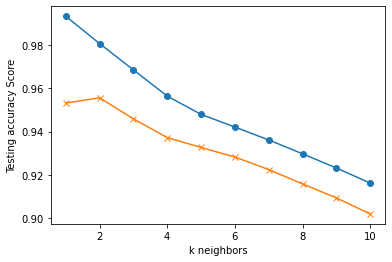

In [35]:
plt.plot(range(1, 11, 1), train_scores, marker='o')
plt.plot(range(1, 11, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [39]:
#chose k = 3
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Predicting a sample

In [45]:
DF.tail(50)

,flightid,airlineid,stopid,flyfrom,flyto,flymins,scid,depart,arrive,fuelprice,price
300209,48054,1,1,6,3,850,2,0,5,3.198,47.34576
300210,66045,1,3,6,5,165,1,4,5,3.198,387.29152
300211,66045,1,3,6,5,165,2,4,5,3.198,45.67024
300212,173781,8,2,4,5,715,2,0,4,3.198,116.21456
300213,200550,8,1,2,5,590,2,0,3,3.198,87.23792
300214,200550,8,1,2,5,590,1,0,3,3.198,676.31872
300215,200556,4,1,2,5,415,2,5,1,3.198,84.62608
300216,155597,4,1,4,3,300,2,2,4,3.198,68.70864
300217,155643,8,1,4,3,540,2,2,5,3.198,77.51744
300218,155643,8,1,4,3,540,1,2,5,3.198,666.69680


In [46]:
x_pred = [8,1,2,5,590,1,0,3,3.198]

# Use the fitted model to predict the y-value of the sample
y_pred = clf.predict([x_pred])

# Display the predicted value
y_pred

C:\Users\shpag\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([[676.31872]])

In [ ]:
# Store the distance to the three nearest neighbors as well as their indices in the dataset
neighbors = reg_knn.kneighbors([[x_pred]])

# Display the distanes and the indices
neighbors

### Visualizing the neighbors

In [ ]:
# Set the seaborn visualization
sns.set()

# Plot the targets versus the inputs
plt.scatter(inputs, target)

# Plot the sample point whose y-value we predicted
plt.scatter(x_pred, y_pred)

# Create two arrays where the x- and y-values of the nearest neighbors will be stored
plot_x_train = []
plot_y_train = []

# Use the indices of the nearest neighbors to fetch their x- and y-values
for i in neighbors[1]:
    plot_x_train.append(inputs[i])
    plot_y_train.append(target[i])

# Encircle the nearest neighbors
plt.scatter(plot_x_train, 
            plot_y_train, 
            s=200, facecolors='none', edgecolors='r');

### Calculating the predicted value

In [ ]:
# Display the y-values of the neighbors together with the predicted y-value

# target[8], y_pred
# target[8], target[3], y_pred
target[8], target[3], target[0], y_pred

In [ ]:
# Find the arithmetic mean of the y-values of the nearest neighbors
(target[8] + target[3] + target[0])/3